# K-NEAREST NEIGHBOURS

## Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


## importing librarie

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

## Dataset:
Need to Classify the animal type


In [5]:
df=pd.read_csv('Zoo.csv')

In [6]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## check the shape of data

In [7]:
df.shape

(101, 18)

### summary statistics

In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### check for datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### check for missing values 

In [11]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

#### observation:
no missing values present in dataset

### check for duplicates

In [12]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


#### observation :
no duplictes present

### Check for taget distribution

In [14]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
df['animal name'] = LabelEncoder.fit_transform(df['animal name'])

## visualizations

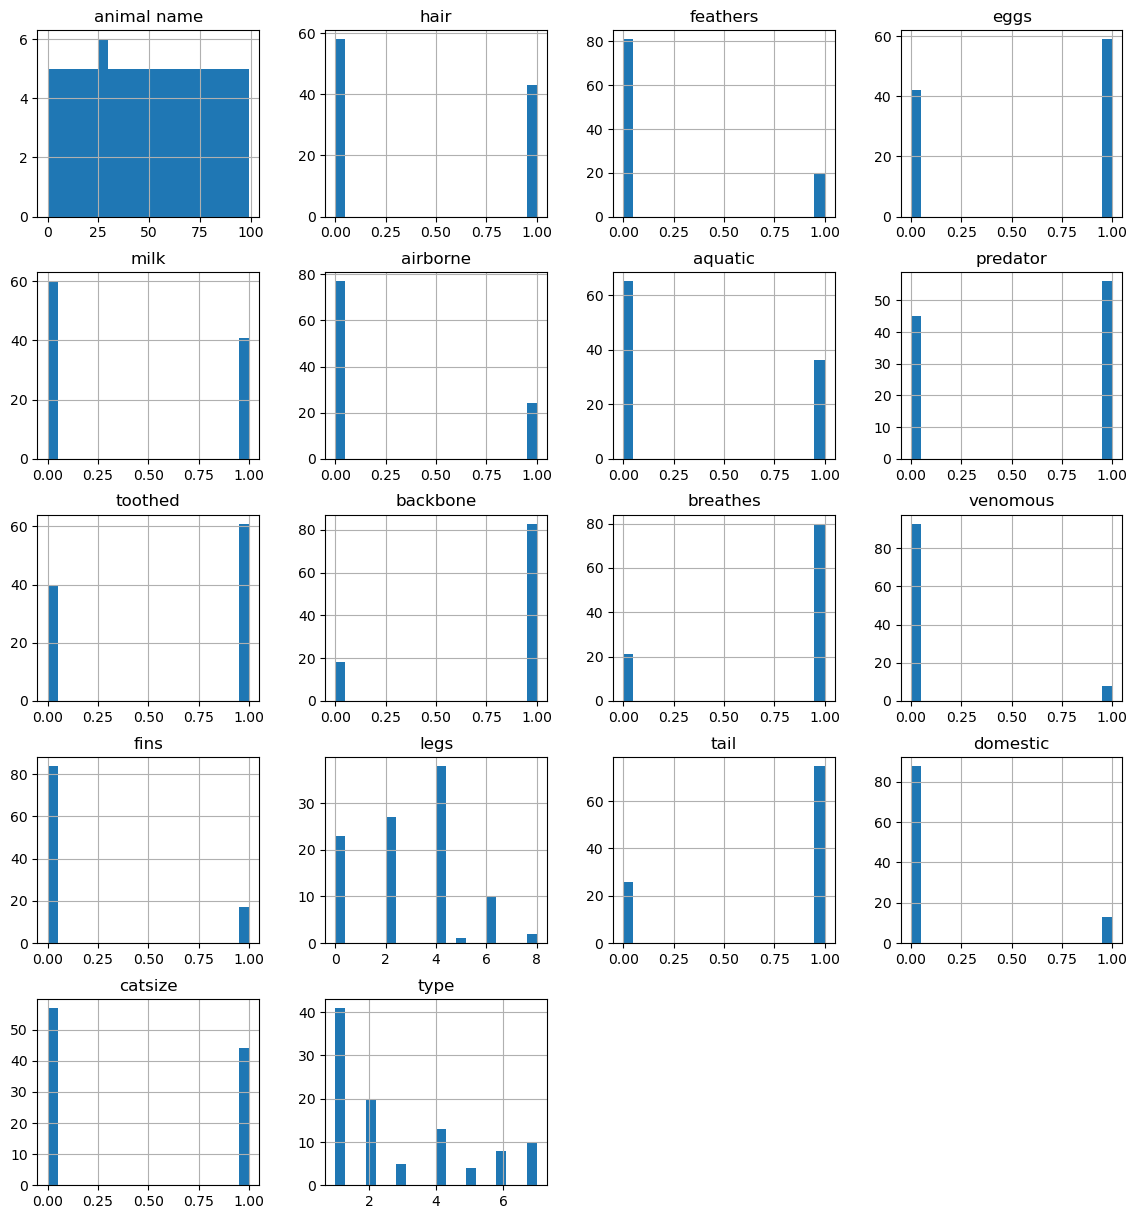

In [34]:
df.hist(bins=20, figsize=(14, 15))
plt.show()


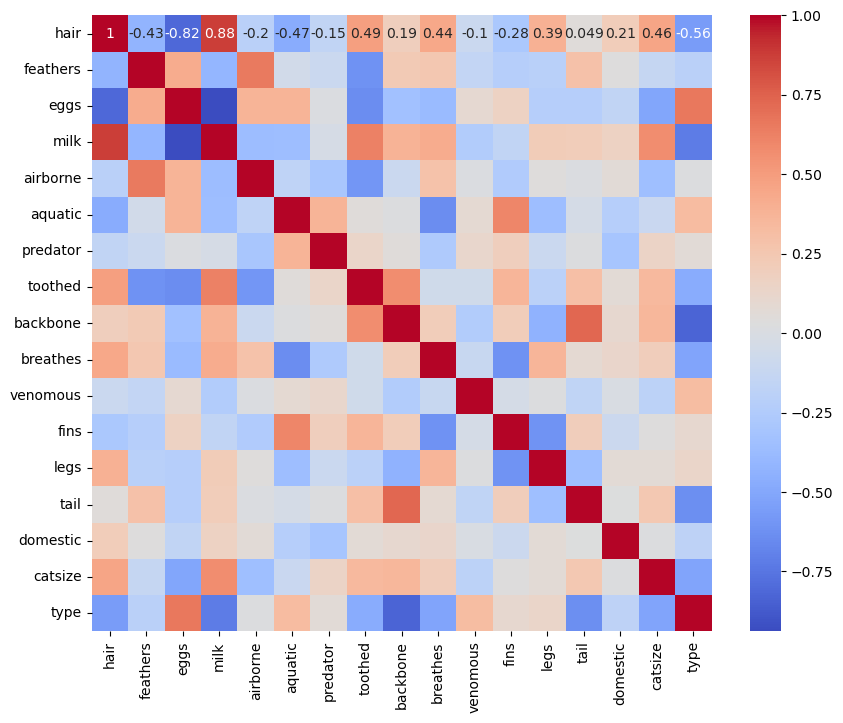

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

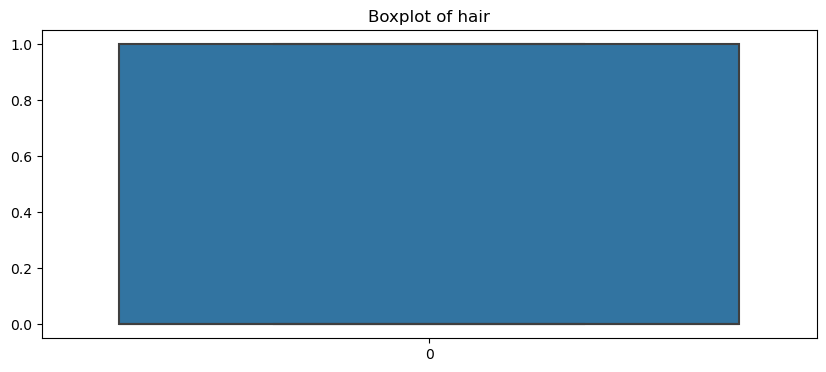

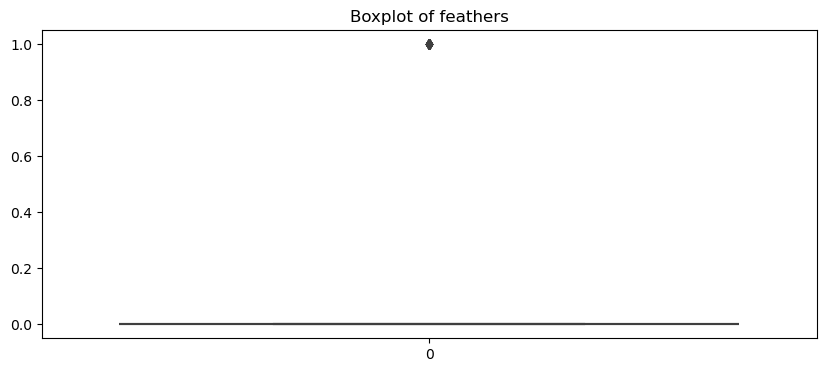

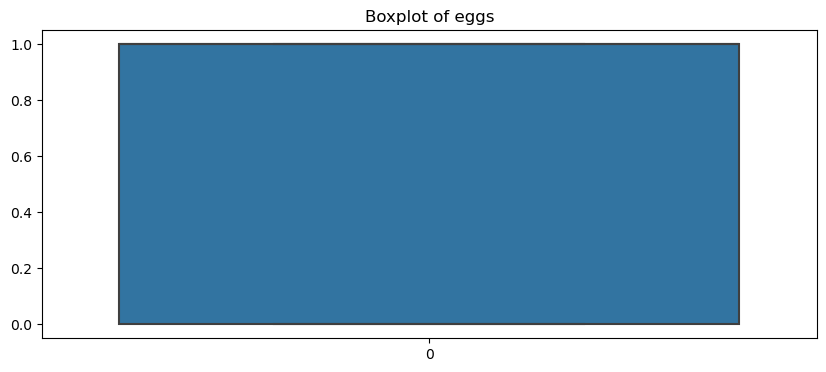

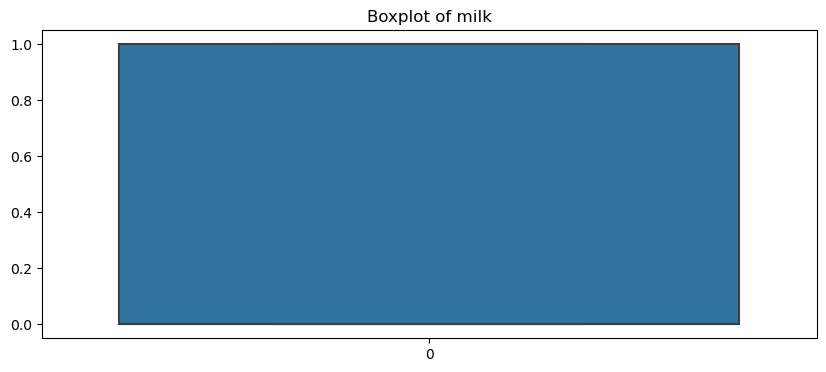

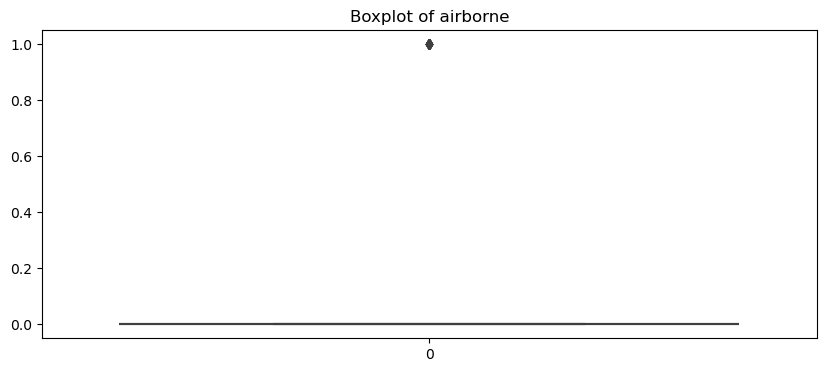

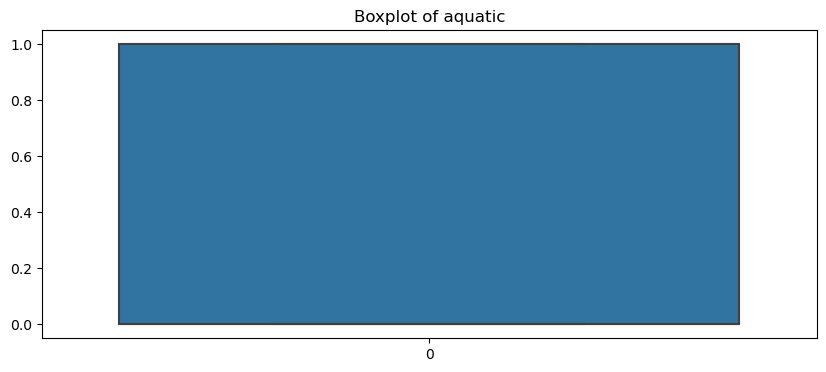

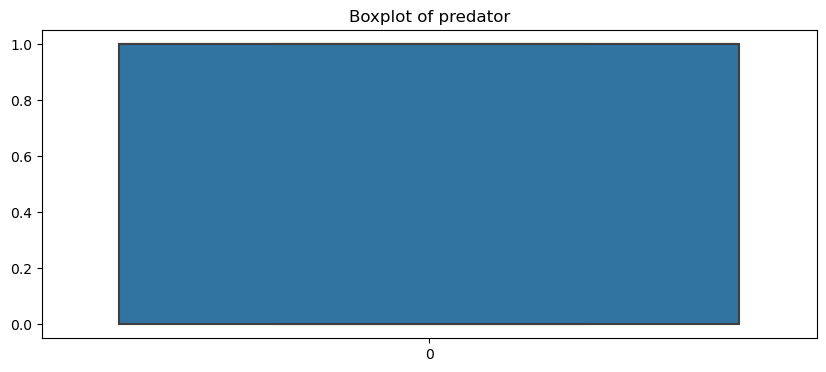

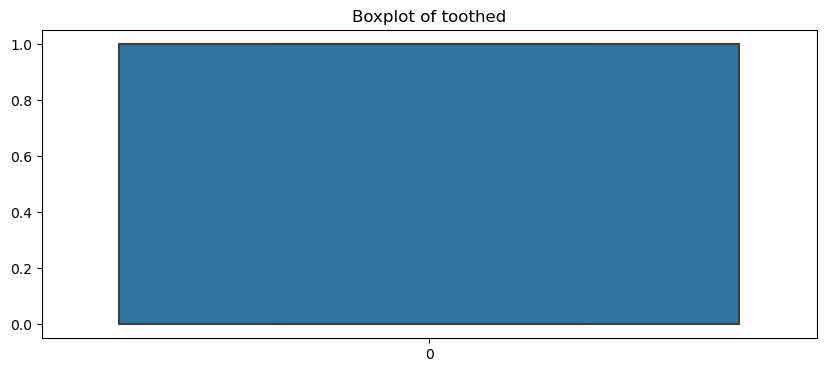

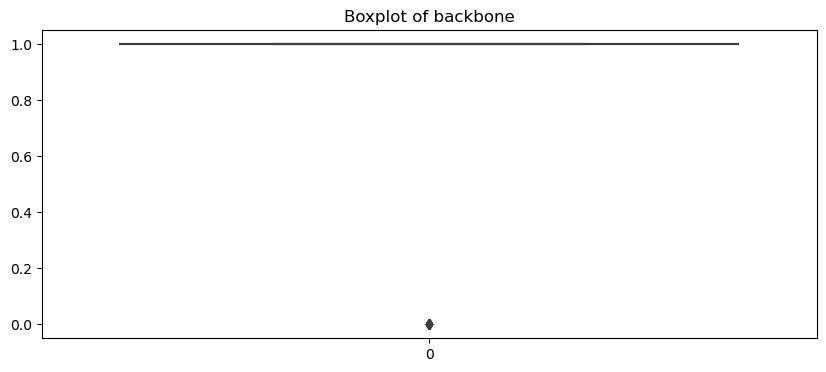

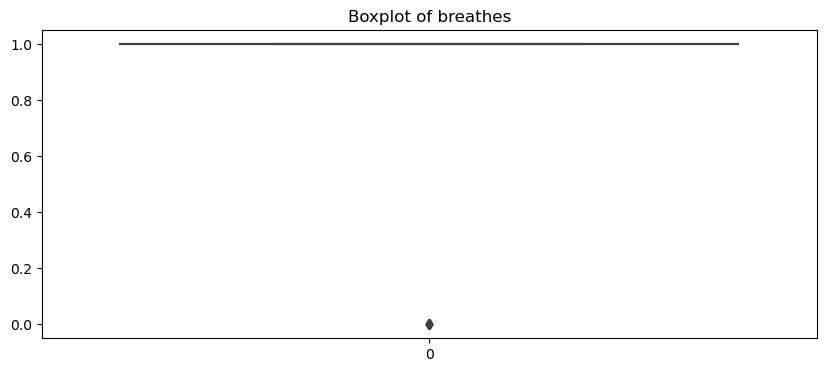

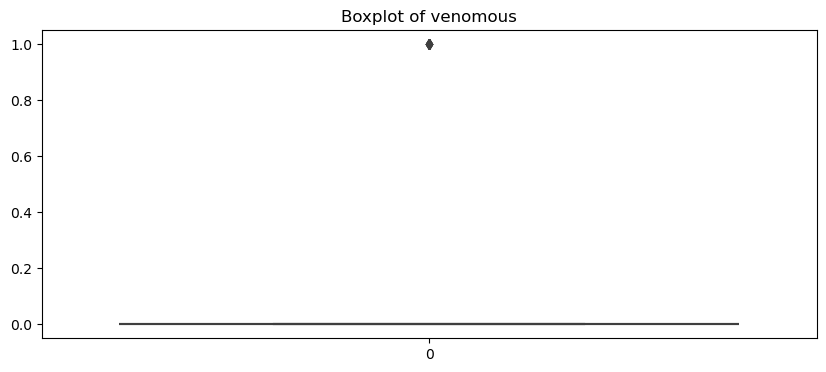

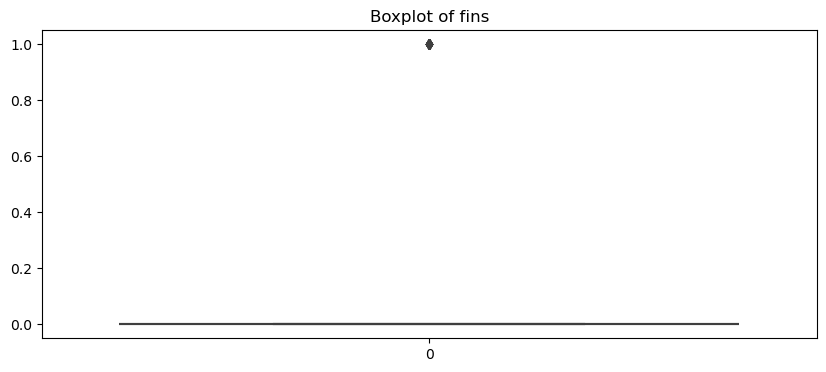

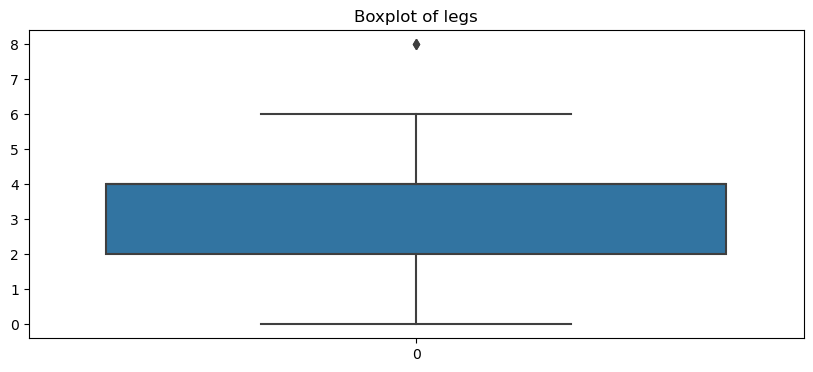

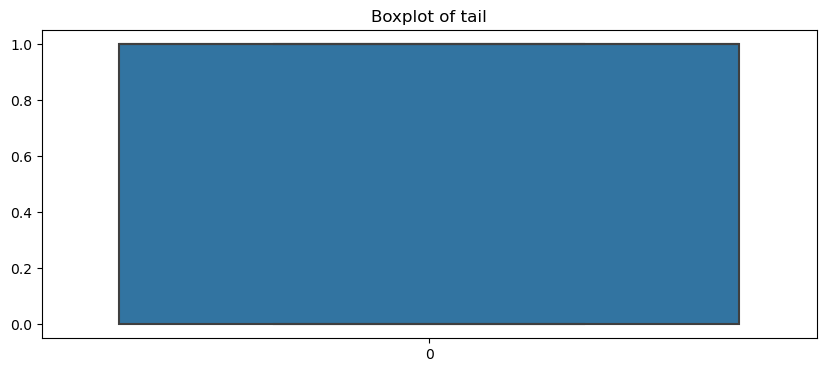

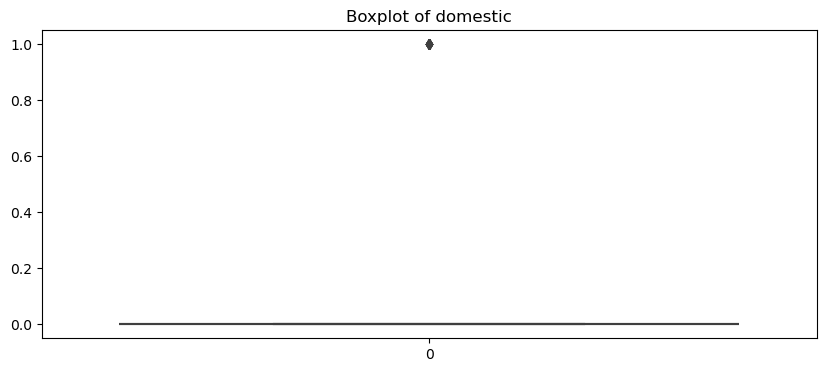

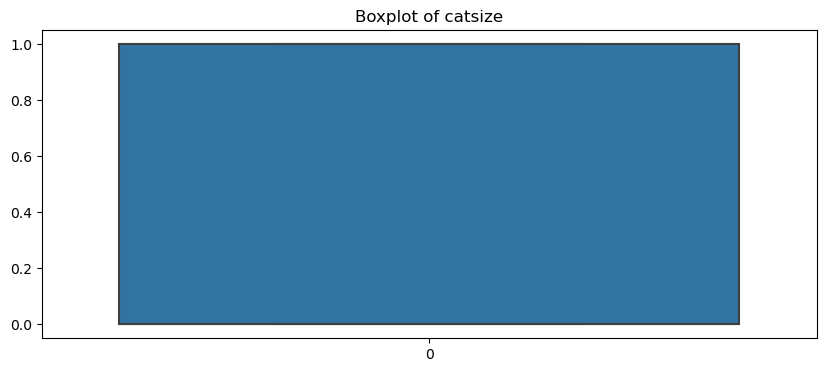

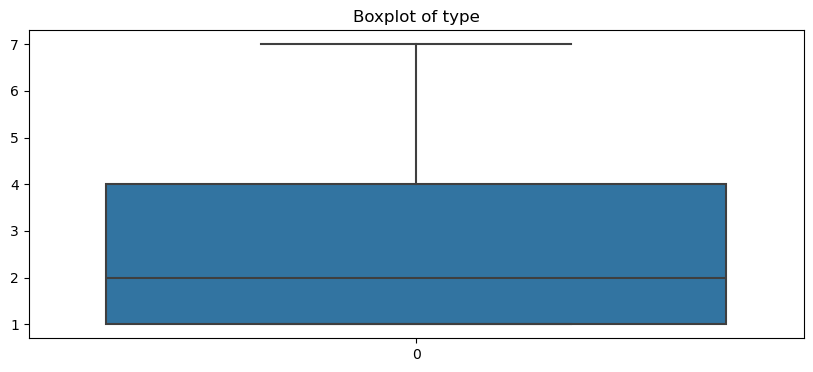

In [37]:
for column in df.columns[1:]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## 3. Split the Dataset

In [39]:
X = df.drop(['type'], axis=1)
y = df['type']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Implement the K-Nearest Neighbours algorithm 

## KNN

In [42]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 1, 1, 1, 6, 2, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1],
      dtype=int64)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5238095238095238
Precision: 0.5238095238095238
Recall: 0.5238095238095238
F1 Score: 0.4947089947089947


### Hyperparameter Tuning:

In [74]:
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [75]:
# Grid Search for best parameters
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31)})

In [77]:
# Best parameters
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

### prepare model on best parameters

In [78]:
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [79]:
# Predictions on the test set
best_y_pred = best_knn.predict(X_test)
best_y_pred

array([2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 7, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [80]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8095238095238095
Precision: 0.8015873015873017
Recall: 0.8095238095238095
F1 Score: 0.7936507936507937
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1
           4       0.50      0.50      0.50         2
           6       1.00      0.67      0.80         3
           7       0.50      1.00      0.67         1

    accuracy                           0.81        21
   macro avg       0.60      0.68      0.61        21
weighted avg       0.80      0.81      0.79        21



Text(0, 0.5, 'accuracy')

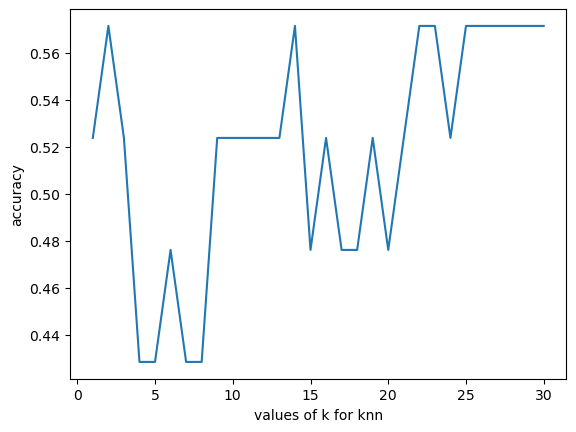

In [85]:
k_range=range(1,31)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    k_score.append(knn.score(X_test,y_test))
plt.plot(k_range,k_score)
plt.xlabel('values of k for knn')
plt.ylabel('accuracy')

## conclusion

In this assignment, we applied Decision Tree Classification to a heart disease dataset, performing data preparation, exploratory data analysis, feature engineering, model training,in model The dataset was split into training (80%) and testing (20%) sets.The model's initial performance metrics is  Moderat to improve model accuracy We performed hyperparameter tuning using GridSearchCV to find the best model parameters.
Best Model Accuracy: 0.5879120879120879 g, and model evaluation.